<h1> Homework 1: Python intro and simple stats</h1>
<h3> Name: Jeremy Rodgers </h3>

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Python/Numpy
My Functions to compute the mean and standard deviation

In [2]:
def findMean(arr):
    totalSum = 0
    for num in arr:
        totalSum += num
    mean = totalSum / len(arr)
    return mean

list = [1.0,2,3,4,5,6,7,8,9,10]
numArr = np.array(list)
val = findMean(numArr)
print(numArr.dtype)
print(val)

float64
5.5


In [3]:
def variance(arr):
    mean = findMean(arr)
    totalSum = 0
    for num in arr:
        distanceSqrd = (num - mean)**2
        totalSum += distanceSqrd
    variance = totalSum / len(arr)
    return variance

def standardDeviation(arr):
    var = variance(arr)
    print("variance ", var)  
    return math.sqrt(var)

strdDev = standardDeviation(numArr)
print("strdDev", strdDev)


variance  8.25
strdDev 2.8722813232690143


In [4]:
mu = np.mean(numArr)
sigma = np.std(numArr) # standard deviation 
print("mean: ", mu)
print("std Dev: ",sigma)

mean:  5.5
std Dev:  2.8722813232690143


## Using stats.norm to sample from normal distribution

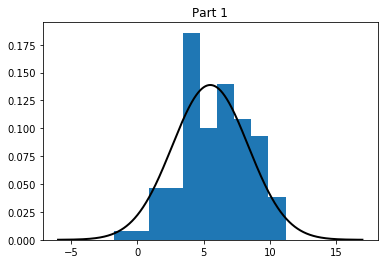

In [5]:
x = sc.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# plt.plot(x, pdf, linewidth=2, color='b')
# plt.show()
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000000)
sample = norm_vars[:100]
# print(sample)

plt.hist(sample, bins=10,density=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("Part 1")
plt.show()

# Part 2 - Data Exploration / Analysis

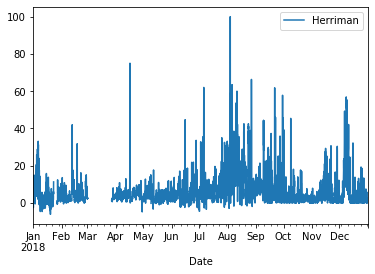

In [6]:
data = pd.read_csv("2018PMData.csv")
hrmnData = data[[data.columns[0],'H3']][2:]
hrmnData.columns = ["Date", "Herriman"]
hrmnData["Date"] = pd.to_datetime(hrmnData['Date'])
hrmnData['Herriman'] = hrmnData['Herriman'].astype(float)
hrmnData.dropna()
hrmnData.plot(x='Date', y='Herriman')

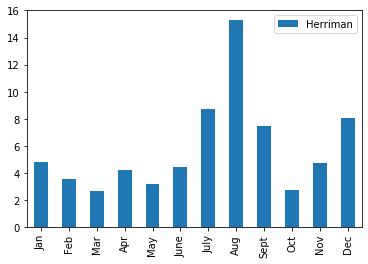

In [7]:
monthlyData = hrmnData.copy()
monthlyData["month"] = monthlyData['Date'].apply(lambda x: x.month)
meanMonthlyData = monthlyData.groupby('month').mean()
meanMonthlyData.index = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
meanMonthlyData.plot(kind = "bar")

By aggregating the data, calculating the mean and plotting the data as a bar chart we get much clearer information. The chart above seems to suggest that August is the worst month for PM2.5 reaching moderately adverse levels.

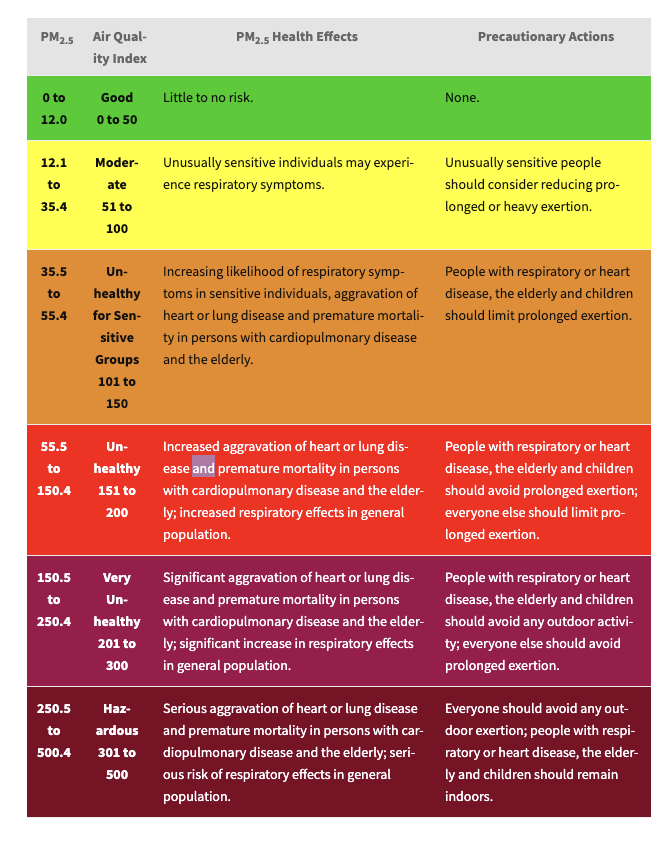
Source: U.S. Environmental Protection Agency
https://blissair.com/what-is-pm-2-5.htm

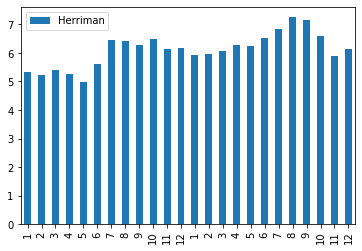

In [8]:
hourlyData = hrmnData.copy()
hourlyData['hour'] = hourlyData['Date'].apply(lambda x : x.hour)
meanHourlyData = hourlyData.groupby('hour').mean()
newIndex = []
for x in meanHourlyData.index:
    newIndex.append(x % 12 + 1)

meanHourlyData.index = newIndex
meanHourlyData.plot(kind = "bar")

From the graph above, there seems to be a small increase in PM2.5 from 6-10AM and again from 6 - 9PM. One explaination for this might be traffic.

## Note: It wasn't completely clear from the instructions whether the assignment was asking for a boxplots grouped by hourly and monthly data or a boxplot of the mean groupings of monthly and hourly data that we have previously aggregated. I'm assuming the correct implementation was the latter as boxplots grouped by month are difficult to read but to be sure, and to get extra practice, I've done both ways...

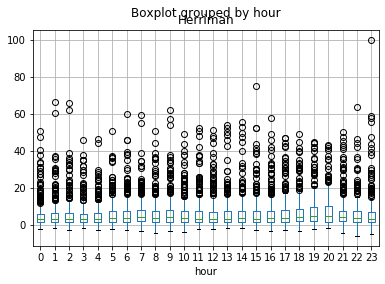

In [9]:
hourlyData.boxplot(column = 'Herriman', by= "hour")

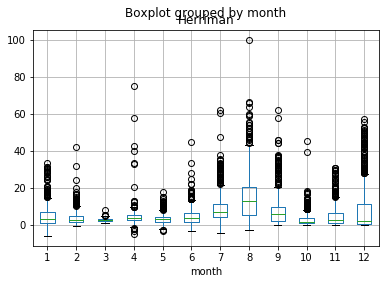

In [10]:
monthlyData.boxplot(column = 'Herriman', by= "month")

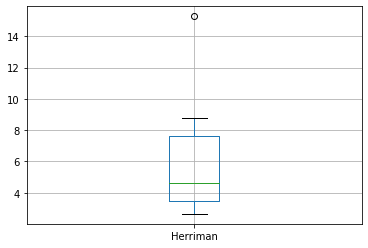

In [11]:
meanMonthlyData.boxplot()

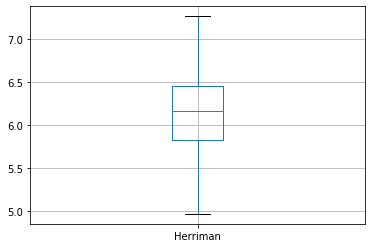

In [12]:
meanHourlyData.boxplot()

### monthly and hourly grouped boxplots
The median value is frequently closer to the 25% quartile suggesting that the data is clustered toward lower values with values becoming more spread out between the 2nd and 3rd quartile.
<br>There are also several large outliers in the data.

### boxplot of mean monthly and hourly data
mean monthly data is grouped towards the lower quartile
<br>The month of August was an outlier
<br>mean hourly data is more evenly distributed than monthly data
